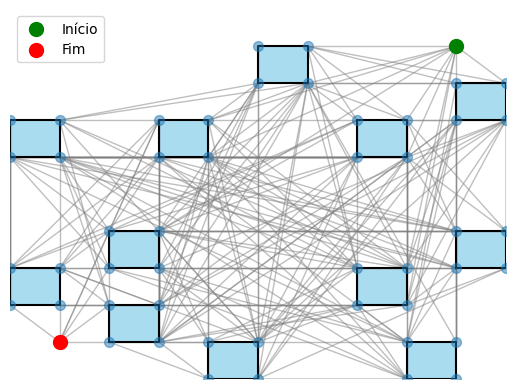

In [28]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

def generate_obstacles(num_obstacles, area_size, obstacle_size):
    obstacles = []
    occupied_cells = set()  

    while len(obstacles) < num_obstacles:
        x = random.randint(0, area_size - obstacle_size)
        y = random.randint(0, area_size - obstacle_size)


        new_obstacle = [(x, y), (x + obstacle_size, y), (x + obstacle_size, y + obstacle_size), (x, y + obstacle_size)]
        new_bbox = (x, y, x + obstacle_size, y + obstacle_size)

        if start in new_obstacle or end in new_obstacle:
            continue  

        overlap = False
        for obs in obstacles:
            ox, oy, ox2, oy2 = min(p[0] for p in obs), min(p[1] for p in obs), max(p[0] for p in obs), max(p[1] for p in obs)
            if not (new_bbox[2] < ox or new_bbox[0] > ox2 or new_bbox[3] < oy or new_bbox[1] > oy2):
                overlap = True
                break

        if not overlap:
            obstacles.append(new_obstacle)
            occupied_cells.add((x // obstacle_size, y // obstacle_size))

    return obstacles

def plot_environment(area_size, obstacles, start, end, path, visibility_graph):
    fig, ax = plt.subplots()
    ax.set_xlim(0, area_size)
    ax.set_ylim(0, area_size)
    
    for obs in obstacles:
        x, y = zip(*obs + [obs[0]])
        ax.fill(x, y, 'skyblue', alpha=0.7)
        ax.plot(x, y, 'k')
    
    pos = {node: node for node in visibility_graph.nodes()}
    nx.draw(visibility_graph, pos, ax=ax, node_size=50, edge_color='gray', alpha=0.5)
    nx.draw_networkx_nodes(visibility_graph, pos, nodelist=[start], node_color='green', label="Início", node_size=100)
    nx.draw_networkx_nodes(visibility_graph, pos, nodelist=[end], node_color='red', label="Fim", node_size=100)
    # nx.draw_networkx_edges(visibility_graph, pos, edgelist=path, edge_color='red', width=2)
    
    plt.legend()
    plt.show()


def create_visibility_graph(obstacles, start, end):
    totaisvertices = [start, end] + [p for obs in obstacles for p in obs]
    G = nx.Graph()

    for i in range(len(totaisvertices)):
        for j in range(i + 1, len(totaisvertices)):
            p1 = totaisvertices[i]
            p2 = totaisvertices[j]
            visivel = True
            for obs in obstacles:
                for k in range(4):  # cada aresta do obstáculo (4 lados)
                    a = obs[k]
                    b = obs[(k+1)%4]
                    if segments_intersect(p1, p2, a, b):
                        visivel = False
                        break
                if not visivel:
                    break
            if visivel:
                dist = np.linalg.norm(np.array(p1) - np.array(p2))
                G.add_edge(p1, p2, weight=dist)
    return G


def segments_intersect(A, B, C, D):
    def ccw(P, Q, R):
        return (R[1] - P[1]) * (Q[0] - P[0]) > (Q[1] - P[1]) * (R[0] - P[0])
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

area_size = 10
num_obstacles = 12
obstacle_size = 1
start = (9, 9)
end = (1, 1)

obstacles = generate_obstacles(num_obstacles, area_size, obstacle_size)
visibility_graph = create_visibility_graph(obstacles, start, end)

# shortest_path = nx.shortest_path(visibility_graph, source=start, target=end, weight='weight')
# path_edges = list(zip(shortest_path, shortest_path[1:]))

plot_environment(area_size, obstacles, start, end, 0, visibility_graph)


#obstacles = (aresta,aresta,aresta...)
#totaisvertices = (vx1,vy1,vx2,vy2...)
# def caminhos(obstacles,totaisvertices):
#     caminhos = []
#     cont1,cont2 = 0,0
#     while cont1 != len(totaisvertices):
#         cont2 = cont1
#         while cont2 != len(totaisvertices):
#             confirma = True
#             for i in obstacles:
#                 r = det(totaisvertices[cont1].x,totaisvertices[cont1].y,totaisvertices[cont2].x,totaisvertices[cont2].y,i.x1,i.y1,i.x2,i.y2)
#             if r is False:
#                 confirma = False
#             if confirma is True:
#                 caminhos.append((totaisvertices[cont1],totaisvertices[cont2]))
#             cont2 +=1
#         cont1+=1
#     return caminhos

